# Yelp Restaurant Reviews: Sentiment, Ratings, and Language

## 1. Introduction

Online review platforms, such as Yelp, provide a rich source of user text that reflects customer experiences, opinions, and satisfaction. Understanding how sentiment is expressed in these reviews is important for both businesses and researchers who are interested in behavioral patterns, text modeling, and bias when looking at observational data. 

In this project, we analyzed a subset of Yelp reviews to explore: 

- The distribution of star ratings
- The relationship between review length and rating
- Linguistic patterns that distinguish positive and negative sentiment
- The performance and interpretability of a simple text-based classifier

Our analysis emphasizes reproducibility, interpretability, and transparent modeling choices, which follow the principles of modern data science workflows. 

## 2. Project Structure & Reproducibility

This repository separates computation from communication:
- Data ingestion, preprocessing, and modeling are performed in modular notebooks and scripts
- This notebook (main.ipynb) serves as the primary narrative
- All figures and tables are loaded from the outputs/ directory

This design ensures:
- Reproducibility without rerunning expensive computations
- Clear separation of concerns
- Deterministic results for graders and collaborators

## 3. Data Overview

We analyzed a subset of Yelp restaurant reviews obtained from the HuggingFace datasets library. Each observation corresponds to a single user review and contains: 

- review: free-text review content
- stars: integer star rating from 1 to 5
- derived sentiment labels used for binary classification

The dataset contains several thousand reviews, with a strong skew toward higher star ratings, which is typical for online review platforms

All data cleaning, preprocessing, and feature extraction are conducted in separate analysis notebooks to ensure modularity and reproducibility. 

## 4. Distribution of Star Ratings

We begin by examining the distribution of star ratings to understand structural properties of the dataset.

(-0.5, 1199.5, 799.5, -0.5)

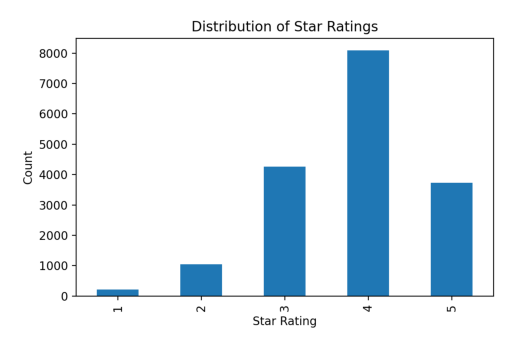

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("outputs/star_rating_distribution.png")
plt.imshow(img)
plt.axis("off")

**Key Observations:** 

- 4-star reviews comprise nearly half of the dataset
- 5-star reviews account for roughly 1/5th of observations
- Low ratings (1-2 stars) constitute less than 8% of all reviews

This skew towards positive ratings suggests a participation bias. Users are more likely to leave reviews following positive experiences. This imbalance has important implications for downstream modeling and evaluation. 

## 5. Review Length and Star Ratings

We next examine whether the number of words in a review varies systematically with star ratings. 

(-0.5, 1279.5, 959.5, -0.5)

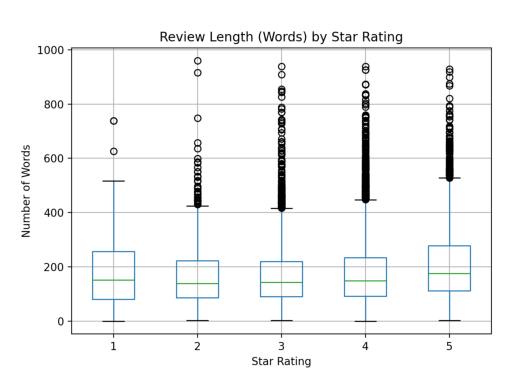

In [4]:
img = Image.open("outputs/review_length_by_star_rating.png")
plt.imshow(img)
plt.axis("off")

Across rating categories, higher-rated reviews tend to be slightly longer on average. However, review length distributions exhibit substantial overlap across all star levels. Extremely long reviews appear in both positive and negative ratings. 

To quantify this relationship, we compute the Spearman rank correlation between star ratings and review length: 

- Spearman ρ ≈ 0.10
- p-value < 0.001

Although statistically significant, the effect size is small, which indicates that review length alone provides limited explanatory power for sentiment.

## 6. Sentiment Class Imbalance

We now examine the balance between positive and negative sentiment labels. 

(-0.5, 1279.5, 959.5, -0.5)

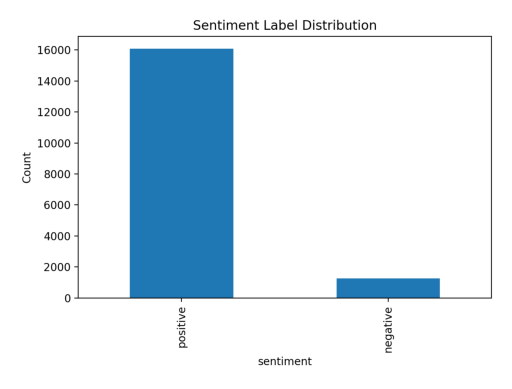

In [5]:
img = Image.open("outputs/class_balance.png")
plt.imshow(img)
plt.axis("off")


**Key Observations**

- Approximately 93% of reviews are positive
- Only ~7% are negative

Naive classifiers might achieve deceptively high accuracy by predicting the majority class. For this reason, later modeling steps use: 

- Stratified train/test splits
- Class-weighted loss functions
- Metrics beyond raw accuracy

## 7. Sentiment Classification Model

A logistic regression classifier was trained using: 

- TF-IDF features
- Unigrams and bigrams
- Class weighting to address imbalance

**Model Performance** 

- Accuracy ≈ 92%
- ROC-AUC ≈ 0.93

However, class-specific performance differs: 

- Positive reviews are classified with high precision and recall
- Negative reviews are more difficult to predict

This asymmetry reflects both class imbalance and linguistic diversity of dissatisfaction.

## 8. Model Interpretability: Important Words and Phrases

A key advantage of linear models is interpretability. We examine the strongest coefficients in the trained classifier. 

**Top Positive Indicators**

(-0.5, 1279.5, 959.5, -0.5)

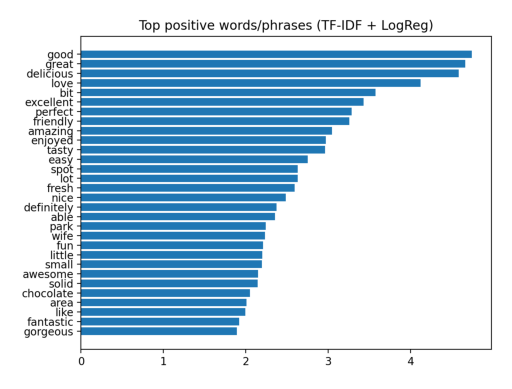

In [6]:
img = Image.open("outputs/top_positive_terms.png")
plt.imshow(img)
plt.axis("off")


Words such as *"great," "delicious," "excellent," and "amazing"* strongly push predictions toward the positive class.

**Top Negative Indicators**

(-0.5, 1279.5, 959.5, -0.5)

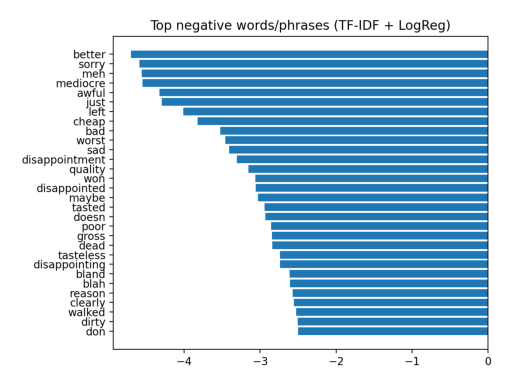

In [7]:
img = Image.open("outputs/top_negative_terms.png")
plt.imshow(img)
plt.axis("off")


Negative sentiment is associated with terms like *“sorry,” “meh,” “mediocre,” “awful,” and “worst.”*

Interestingly, some words (e.g., *“better”*) appear as negative indicators, likely reflecting comparative complaints (“it used to be better”).

## 9. Discussion

Our findings suggest: 

- Sentiment is conveyed primarily through explicit evaluative language
- Review length plays a secondary role
- Simple lexical models can be effective and interpretable when properly weighted

Despite their simplicity, TD-TDF features combined with linear classifiers perform competitively for sentiment analysis tasks while remaining transparent and easy to audit. 

## 10. Limitations and Future Work

This analysis relies on bag-of-words representations, which ignore:

- Word order beyond short n-grams
Contextual meaning

Sarcasm or implicit sentiment

Future work could explore:

Transformer-based embeddings

Aspect-based sentiment analysis

Domain adaptation across business categories